In [1]:
import yfinance as yf
import pandas as pd
import pandas_ti
import mplfinance as mpf
import pandas as pd

import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt

In [2]:
ticker = "TSLA"
df = yf.Ticker(ticker).history(start='2015-01-01', period="10y", interval="1d")[['Open', 'High', 'Low', 'Close', 'Volume']]
print(df.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2024-12-24 00:00:00-05:00  435.899994  462.779999  435.140015  462.279999   
2024-12-26 00:00:00-05:00  465.160004  465.329987  451.019989  454.130005   
2024-12-27 00:00:00-05:00  449.519989  450.000000  426.500000  431.660004   
2024-12-30 00:00:00-05:00  419.399994  427.000000  415.750000  417.410004   
2024-12-31 00:00:00-05:00  423.790009  427.929993  402.540009  403.839996   

                             Volume  
Date                                 
2024-12-24 00:00:00-05:00  59551800  
2024-12-26 00:00:00-05:00  76366400  
2024-12-27 00:00:00-05:00  82666800  
2024-12-30 00:00:00-05:00  64941000  
2024-12-31 00:00:00-05:00  76825100  


In [3]:
my_style = mpf.make_mpf_style(
    base_mpf_style='classic',
    facecolor='white',
    gridcolor='white',
    gridstyle='-',
    y_on_right=False,
    rc={
        'axes.edgecolor': 'black',
        'axes.spines.top': False,
        'axes.spines.right': False
    }
)

In [4]:
df['TR'] = df.ti.TR()
df['RTR'] = df.ti.RTR()
df['ARTR_7'] = df.ti.ARTR(length=7)
df['ARTR_14'] = df.ti.ARTR(length=14)
df['ARTR_30'] = df.ti.ARTR(length=30)

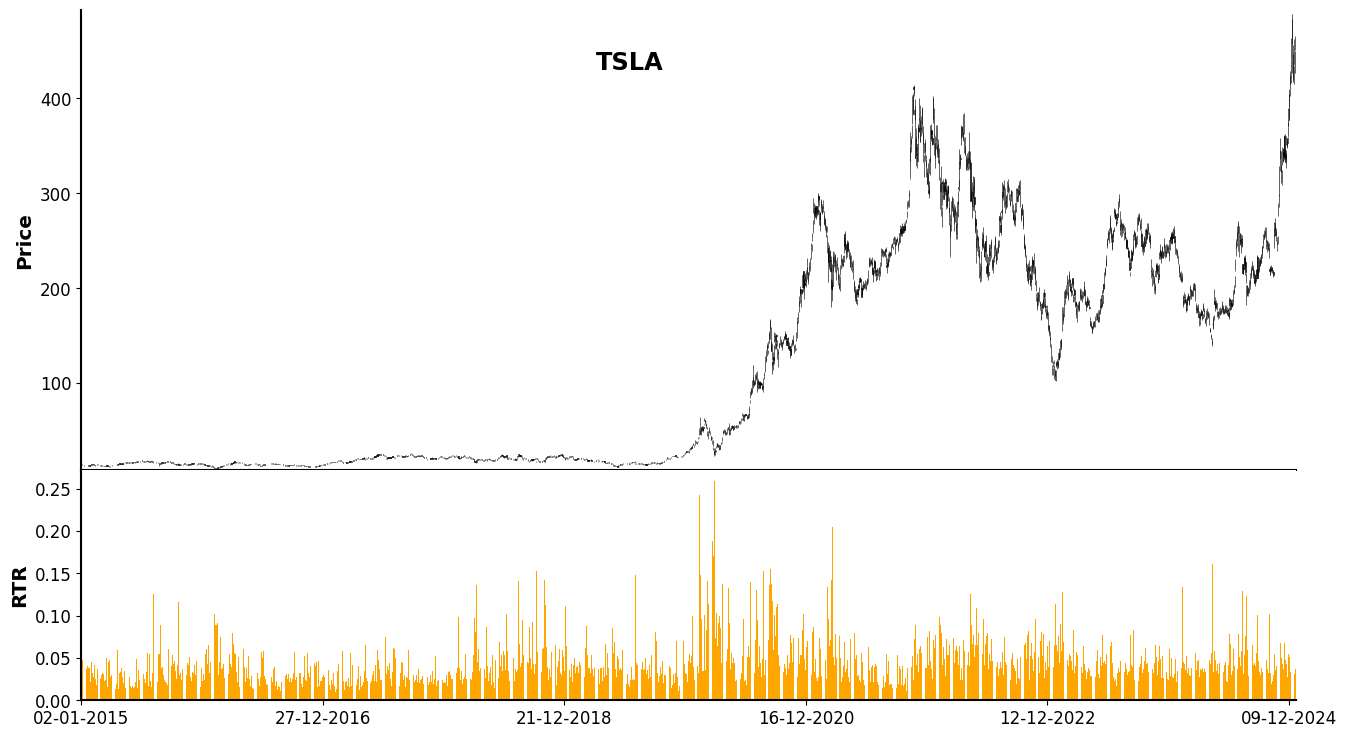

In [5]:
apds = [mpf.make_addplot(df['RTR'], panel=1, type='bar', color='orange', ylabel='RTR')]
mpf.plot(df, type='candle', warn_too_much_data=13000, addplot=apds, volume=False, style=my_style, datetime_format='%d-%m-%Y', xrotation=0, figsize=(14, 8), panel_ratios=(2,1), tight_layout=True, title=ticker)


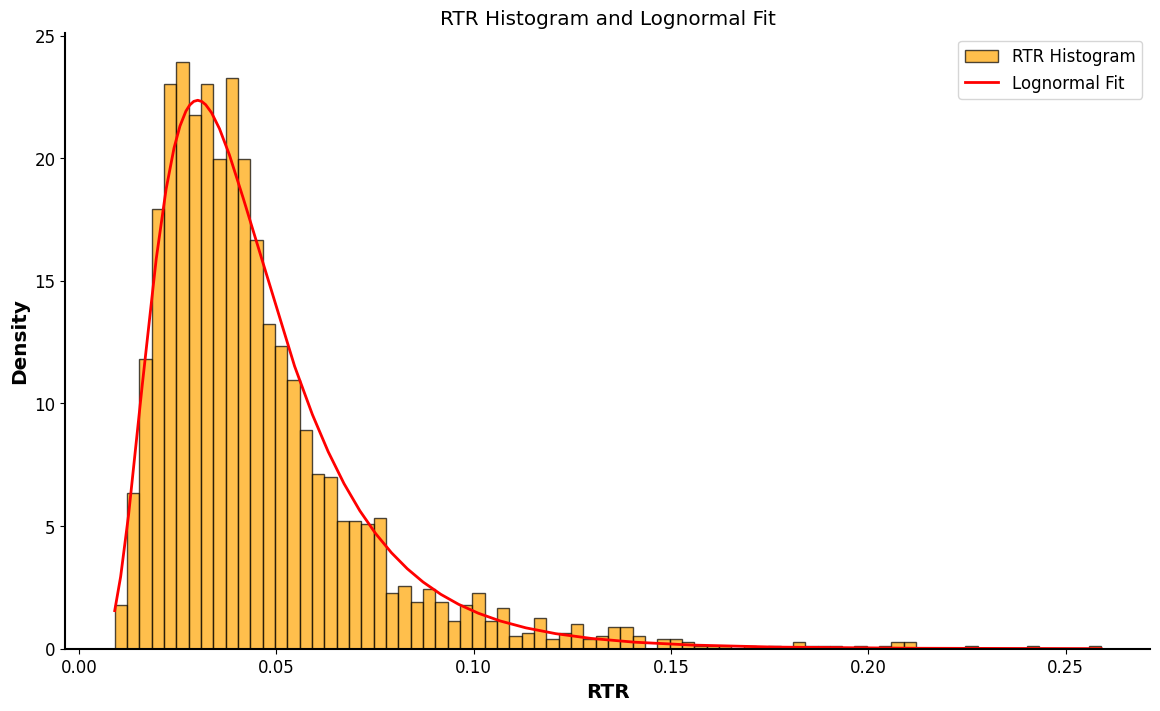

In [6]:
plt.figure(figsize=(14, 8))

# Histogram
n_rtr, bins_rtr, patches_rtr = plt.hist(df['RTR'], bins=80, color='orange', edgecolor='black', alpha=0.7, density=True, label='RTR Histogram')

# Lognormal fit
shape, loc, scale = lognorm.fit(df['RTR'], floc=0)
x = np.linspace(df['RTR'].min(), df['RTR'].max(), 500)
pdf = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf, 'r-', lw=2, label='Lognormal Fit')

plt.xlabel('RTR')
plt.ylabel('Density')
plt.title(f'RTR Histogram and Lognormal Fit')
plt.legend()
plt.grid(False)
plt.show()


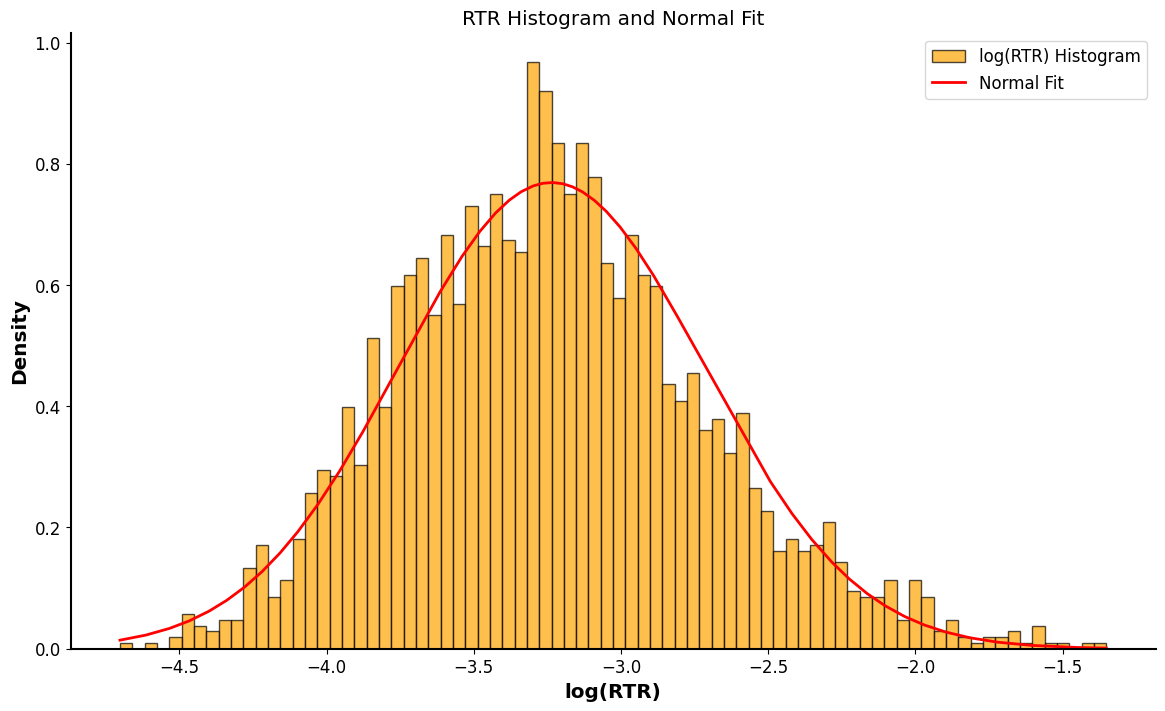

In [7]:
# Make sure RTR is valid for the log
log_rtr = np.log(df['RTR'])

plt.figure(figsize=(14, 8))

# Histogram
n_rtr, bins_rtr, patches_rtr = plt.hist(log_rtr, bins=80, color='orange', edgecolor='black', alpha=0.7, density=True, label='log(RTR) Histogram')

# Normal fit
loc, scale = norm.fit(log_rtr) # using scipy.stats.norm
loc = log_rtr.mean()
scale = log_rtr.std()
x = np.linspace(log_rtr.min(), log_rtr.max(), 500)
pdf = norm.pdf(x, loc=loc, scale=scale)
plt.plot(x, pdf, 'r-', lw=2, label=f'Normal Fit')

plt.xlabel('log(RTR)')
plt.ylabel('Density')
plt.title('RTR Histogram and Normal Fit')
plt.legend()
plt.grid(False)
plt.show()


In [8]:
df['SRTR_iid_1000_30'] = df.ti.SRTR(N=1000, n=30, method='iid')
df['SRTR_cluster_1000_30'] = df.ti.SRTR(N=1000, n=30, method='cluster')

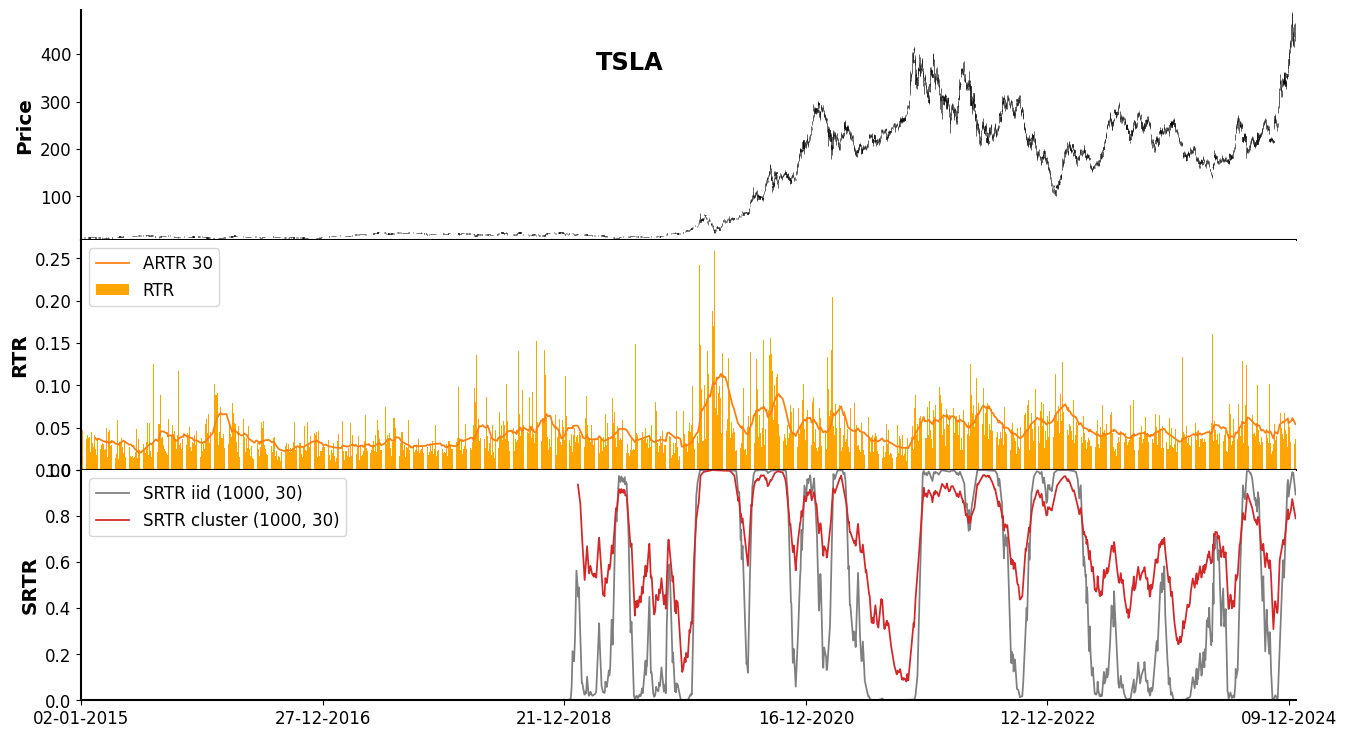

In [9]:
apds = [
    mpf.make_addplot(df['RTR'], panel=1, type='bar', color='orange', ylabel='RTR', label='RTR'),
    mpf.make_addplot(df['ARTR_30'], panel=1, color='tab:orange', ylabel='RTR', label='ARTR 30'),
    mpf.make_addplot(df['SRTR_iid_1000_30'], panel=2, color='tab:grey', ylabel='SRTR', label='SRTR iid (1000, 30)', ylim=(0, 1)),
    mpf.make_addplot(df['SRTR_cluster_1000_30'], panel=2, color='tab:red', ylabel='SRTR', label='SRTR cluster (1000, 30)', ylim=(0, 1))
]
mpf.plot(df, type='candle', warn_too_much_data=13000, addplot=apds, volume=False, style=my_style, datetime_format='%d-%m-%Y', xrotation=0, figsize=(14, 8), panel_ratios=(1,1), tight_layout=True, title=ticker)


In [10]:
df['SRTR_1000_30_expanded'] = df.ti.SRTR(N=1000, n=30)
df['SRTR_1000_30'] = df.ti.SRTR(N=1000, n=30, expand=False)

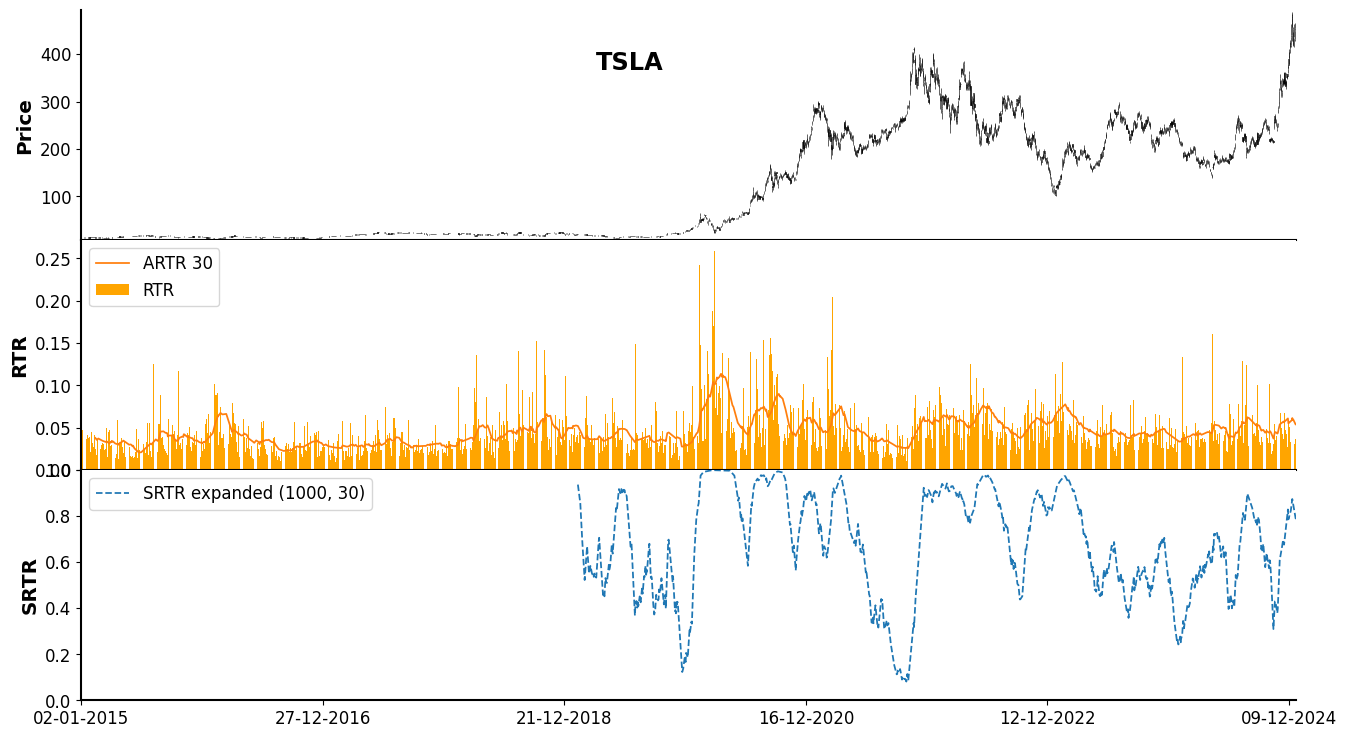

In [ ]:

apds = [
    mpf.make_addplot(df['RTR'], panel=1, type='bar', color='orange', ylabel='RTR', label='RTR'),
    mpf.make_addplot(df['ARTR_30'], panel=1, color='tab:orange', ylabel='RTR', label=f'ARTR 30'),
    mpf.make_addplot(df['SRTR_1000_30_expanded'], panel=2, color='tab:blue', ylabel='SRTR', label='SRTR expanded (1000, 30)', ylim=(0, 1)),
    mpf.make_addplot(df['SRTR_1000_30'], panel=2, color='tab:red', ylabel='SRTR', label='SRTR (1000, 30)', ylim=(0, 1)),
]

mpf.plot(df, type='candle', warn_too_much_data=13000, addplot=apds, volume=False, style=my_style, datetime_format='%d-%m-%Y', xrotation=0, figsize=(14, 8), panel_ratios=(1,1), tight_layout=True, title=ticker)

In [12]:
df['SRTR_1000_14'] = df.ti.SRTR(N=1000, n=14)

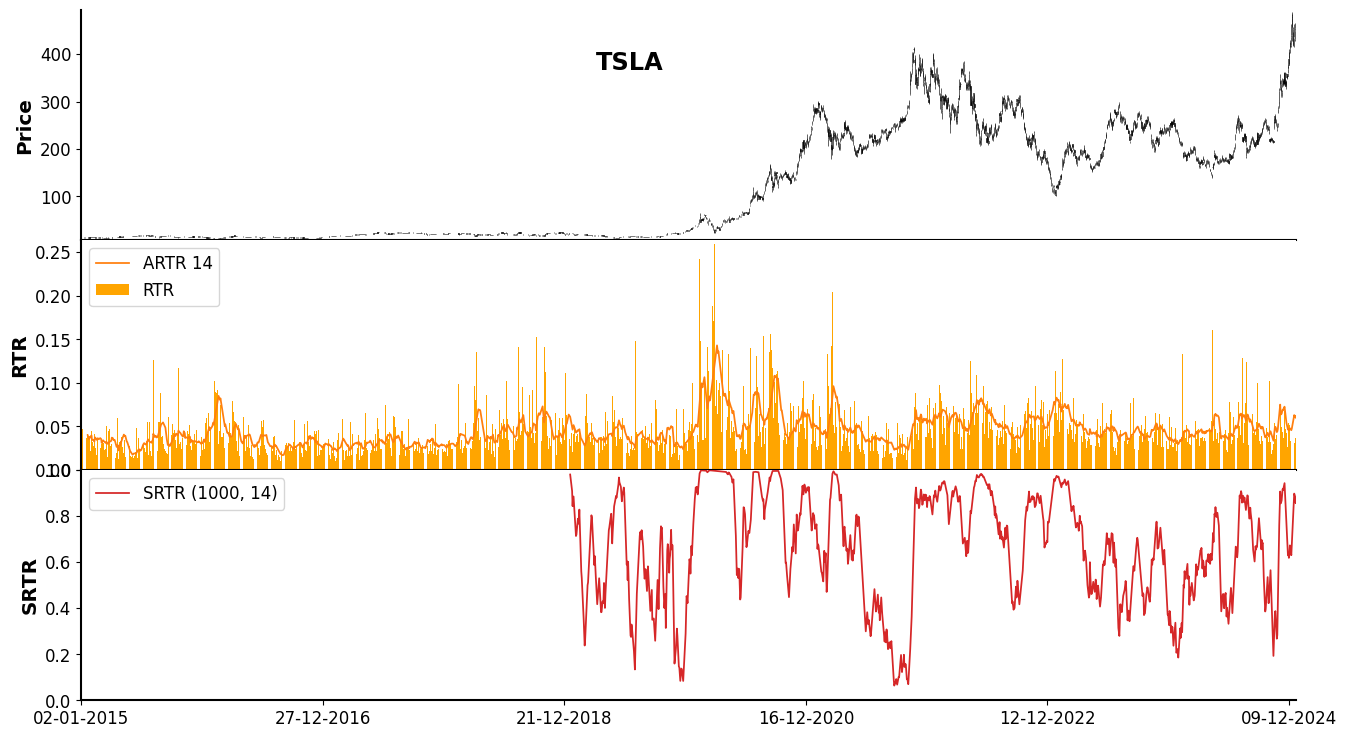

In [13]:
apds = [
    mpf.make_addplot(df['RTR'], panel=1, ylim=(0, max(df['RTR']) + 0.005), type='bar', color='orange', ylabel='RTR', label='RTR'),
    mpf.make_addplot(df['ARTR_14'], panel=1, color='tab:orange', ylabel='RTR', label='ARTR 14'),
    mpf.make_addplot(df['SRTR_1000_14'], panel=2, ylim=(0, 1), color='tab:red', ylabel='SRTR', label='SRTR (1000, 14)')
]
mpf.plot(df, type='candle', warn_too_much_data=13000, addplot=apds, volume=False, style=my_style, datetime_format='%d-%m-%Y', xrotation=0, figsize=(14, 8), panel_ratios=(1,1), tight_layout=True, title=ticker)